# Moment d'inertie du gyroscope

La période de précession, $T_{\psi}$ est reliée à la vitesse angulaire $\dot{\phi}$ par la relation
$$ \dot{\phi} = \frac{amg}{2\pi C}T_{\psi} $$
avec $a = 7.3~\mathrm{cm}$, $m = 165.24~\mathrm{g}$.

On a mesuré (tachymètre pour $\dot{\phi}$ et au chronomètre pour $T_{\psi}$):

| $\dot{\phi}$ (rpm) | $T_{\psi}$ (s) | $\Delta\dot{\phi}$ (rpm) |
|:------------------:|:------------------------:|:--------------:|
|308.5               | 6.81                     | 30.5           |
|294                 | 7.22                     | 4              |
|386                 | 9.5                      | 5              |
|486.5               | 11.88                    | 9.5            |
|629                 | 15.35                    | 11             |
|760                 | 16.53                    | 10             |
|910                 | 22.34                    | 40             |
|1000                | 24.25                    | 50             |
|1033                | 24.87                    | 65             |
|1303.5              | 31.5                     | 103.5          |
|1470                | 35.68                    | 130            |

- Tracer avec les barres d'erreur en utilisant `plt.errorbar`
- Trouver la valeur expérimentale du moment d'inertie en tenant compte de l'incertitude en utilise 
`from scipy.optimize import curve_fit`

In [1]:
import matplotlib
matplotlib.use('nbagg')

In [2]:
import numpy as np

M = np.array([
    [308.5, 6.81, 30.5],
    [294, 7.22, 4],
    [386, 9.5, 5],
    [486.5, 11.88, 9.5],
    [629, 15.35, 11],
    [760, 16.53, 10],
    [910, 22.34, 40],
    [1000, 24.25, 50],
    [1033, 24.87, 65],
    [1303.5, 31.5, 103.5],
    [1470, 35.68, 130]])
    
dotphi = M[:,0]
err_dotphi = M[:,2]
T = M[:,1]

<IPython.core.display.Javascript object>


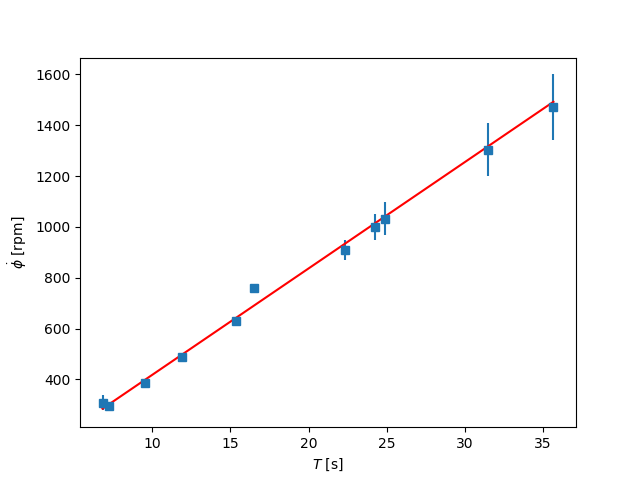

alpha = 41.8238669493 ± 0.267042971182


In [3]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def model_function(x, alpha):
    return alpha*x

popt, pcov = curve_fit(model_function, T, dotphi, sigma=err_dotphi, absolute_sigma=True)
alpha_fit = popt[0]
err_alpha = np.sqrt(np.diag(pcov))[0]
plt.figure(1)
plt.errorbar(T, dotphi, yerr=err_dotphi, fmt='s')
TT = np.linspace(np.min(T), np.max(T), 5)
plt.plot(TT, alpha_fit*TT, 'r-')
plt.xlabel(r'$T$ [s]')
plt.ylabel(r'$\dot{\phi}$ [rpm]')
plt.show()
print('alpha =', alpha_fit, '±', err_alpha)

$$ C = \frac{a mg}{2\pi\alpha} $$

In [4]:
a = 7.3e-2
m = 165.24e-3
g = 9.81
rpm = 2*np.pi/60
C = a*m*g/(2*np.pi*(alpha_fit*rpm))
print('C =', C, 'kg/m^2')

C = 0.00430005869 kg/m^2
